## Numpy Practice #4
- From https://numpy.org/numpy-tutorials/content/tutorial-svd.html

### Linear Algebra on n-dimensional arrays

#### Learning Objectives
- After this tutorial, you should be able to:
    - Understand the difference between one-, two- and n-dimensional arrays in NumPy;
    - Understand how to apply some linear algebra operations to n-dimensional arrays without using for-loops;
    - Understand axis and shape properties for n-dimensional arrays.

#### Content
- In this tutorial, we will use matrix decomposition from linear algebra, the Singular Value Decomposition (SVD), to generate a compressed approximation of an image. We'll use the face image from the scipy.datasets module:


In [1]:
# TODO: Rm try-except with scipy 1.10 is the minimum supported version
try:
    from scipy.datasets import face
except ImportError:  # Data was in scipy.misc prior to scipy v1.10
    from scipy.misc import face

img = face()

- **Note**: If you prefer, you can use your own image as you work through this tutorial. In order to transform your image into a NumPy array that can be manipulated, you can use the imread function from the matplotlib.pyplot submodule. Alternatively, you can use the imageio.imread function from the imageio library. Be aware that if you use your own image, you’ll likely need to adapt the steps below. For more information on how images are treated when converted to NumPy arrays, see A crash course on NumPy for images from the scikit-image documentation.

- Now, img is a NumPy array, as we can see when using the type function:

In [2]:
type(img)

numpy.ndarray

- We can see the image using the matplotlib.pyplot.imshow function & the special iPython command, %matplotlib inline to display plots inline:

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

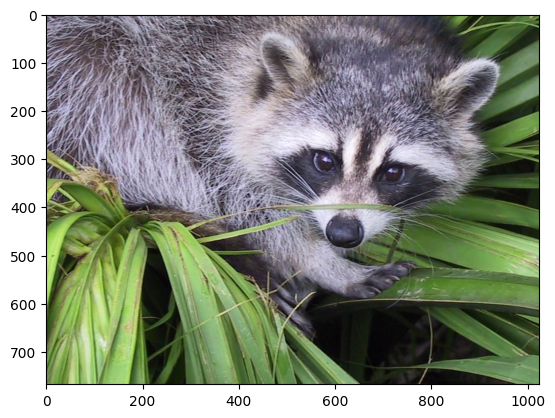

In [4]:
plt.imshow(img)
plt.show()

#### Shape, axis and array properties
- Note that, in linear algebra, the dimension of a vector refers to the number of entries in an array. In NumPy, it instead defines the number of axes. For example, a 1D array is a vector such as [1, 2, 3], a 2D array is a matrix, and so forth.

- First, let’s check for the shape of the data in our array. Since this image is two-dimensional (the pixels in the image form a rectangle), we might expect a two-dimensional array to represent it (a matrix). However, using the shape property of this NumPy array gives us a different result:

In [5]:
img.shape

(768, 1024, 3)

- The output is a tuple with three elements, which means that this is a three-dimensional array. Since this is a color image, and we have used the imread function to read it, the data is organized as a 768×1024 grid of pixels, where each pixel contains 3 values representing color channels (red, green and blue - RGB). You can see this by looking at the shape, where the leftmost number corresponds to the outermost axis (image height), the middle number to the next axis (image width) and the rightmost number to the innermost axis (the color channels).

- Furthermore, using the ndim property of this array, we can see that

In [6]:
img.ndim

3

- NumPy refers to each dimension as an axis. Because of how imread works, the first index in the 3rd axis is the red pixel data for our image. We can access this by using the syntax

In [7]:
img[:, :, 0]

array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]], dtype=uint8)

- From the output above, we can see that every value in img[:, :, 0] is an integer value between 0 and 255, representing the level of red in each corresponding image pixel (keep in mind that this might be different if you use your own image instead of scipy.datasets.face).

- As expected, this is a 768x1024 matrix:

In [8]:
img[:, :, 0].shape

(768, 1024)

- Since we are going to perform linear algebra operations on this data, it might be more interesting to have real numbers between 0 and 1 in each entry of the matrices to represent the RGB values. We can do that by setting

In [9]:
img_array = img / 255

- This operation, dividing an array by a scalar, works because of NumPy’s broadcasting rules. (Note that in real-world applications, it would be better to use, for example, the img_as_float utility function from scikit-image).

- You can check that the above works by doing some tests; for example, inquiring about maximum and minimum values for this array:

In [10]:
img_array.max(), img_array.min()

(np.float64(1.0), np.float64(0.0))

- or checking the type of data in the array:

- Note that we can assign each color channel to a separate matrix using the slice syntax:

In [11]:
red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]

#### Operations on an axis
- It is possible to use methods from linear algebra to approximate an existing set of data. Here, we will use the SVD (Singular Value Decomposition) to try to rebuild an image that uses less singular value information than the original one, while still retaining some of its features.

- Note: We will use NumPy’s linear algebra module, numpy.linalg, to perform the operations in this tutorial. Most of the linear algebra functions in this module can also be found in scipy.linalg, and users are encouraged to use the scipy module for real-world applications. However, some functions in the scipy.linalg module, such as the SVD function, only support 2D arrays. For more information on this, check the scipy.linalg page.

- To proceed, import the linear algebra submodule from NumPy:

In [12]:
from numpy import linalg

- In order to extract information from a given matrix, we can use the SVD to obtain 3 arrays which can be multiplied to obtain the original matrix. From the theory of linear algebra, given a matrix A
, the following product can be computed: 
    - UεV<sup>T</sup> = A
- where U and V<sup>T</sup> are square and ε is the same size as A. ε is a diagonal matrix and contains the singular value of A, organized from largest to smallest. These values are always non-negative and can be used as an indicator of the "importance" of some features represented by the matrix A.

- Let's see how this works in practice with just one matrix first. **Note**, that according to colorimetry, it is possible to obtain a fairly reasonable grayscale version of our color image if we apply the formula:
    - Y = 0.2126R + 0.7152G + 0.0722B
- where Y is the array representing the grayscale image, and R, G, and B are the red, green and blue channel arrays we had originally. Notice we can use the @ operator (the matrix multiplication operator for Numpy arrays) for this.

In [13]:
img_gray = img_array @ [0.2126, 0.7152, 0.0722]

- Now, img_gray has shape

In [14]:
img_gray.shape

(768, 1024)

- To see if this makes sense in our image, we should use a colormap from matplotlib corresponding to the color we wish to see in out image (otherwise, matplotlib will default to a colormap that does not correspond to the real data).

- In our case, we are approximating the grayscale portion of the image, so we will use the colormap gray:

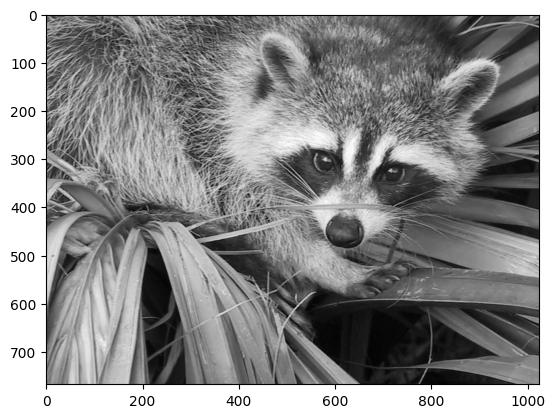

In [15]:
plt.imshow(img_gray, cmap="gray")
plt.show()

- Now, applying the linalg.svd function to this matrix, we obtain the following decomposition:

In [16]:
U, s, Vt = linalg.svd(img_gray)

- **Note** If you are using your own image, this command might take a while to run, depending on the size of your image and your hardware. Don’t worry, this is normal! The SVD can be a pretty intensive computation.

- Let’s check that this is what we expected:

In [18]:
U.shape, s.shape,Vt.shape

((768, 768), (768,), (1024, 1024))

- Note that s has a particular shape: it has only one dimension. This means that some linear algebra functions that expect 2d arrays might not work. For example, from the theory, one might expect s and Vt to be compatible for multiplication. However, this is not true as s does not have a second axis. Executing

In [20]:
# s @ Vt # cause a ValueError

- results in a ValueError. This happens because having a one-dimensional array for s, in this case, is much more economic in practice than building a diagonal matrix with the same data. To reconstruct the original matrix, we can rebuild the diagonal matrix 
 with the elements of s in its diagonal and with the appropriate dimensions for multiplying: in our case, 
 should be 768x1024 since U is 768x768 and Vt is 1024x1024. In order to add the singular values to the diagonal of Sigma, we will use the fill_diagonal function from NumPy:

In [21]:
import numpy as np

Sigma = np.zeros((U.shape[1], Vt.shape[0]))
np.fill_diagonal(Sigma, s)

- Now, we want to check if the reconstructed U @ Sigma @ Vt is close to the original img_gray matrix.

#### Approximation
- The linalg module includes a norm function, which computes the norm of a vector or matrix represented in a NumPy array. For example, from the SVD explanation above, we would expect the norm of the difference between img_gray and the reconstructed SVD product to be small. As expected, you should see something like

In [22]:
linalg.norm(img_gray - U @ Sigma @ Vt)

np.float64(1.3921662042990064e-12)

- (The actual result of this operation might be different depending on your architecture and linear algebra setup. Regardless, you should see a small number.)

- We could also have used the numpy.allclose function to make sure the reconstructed product is, in fact, close to our original matrix (the difference between the two arrays is small):

In [23]:
np.allclose(img_gray, U @ Sigma @ Vt)

True

- To see if an approximation is reasonable, we can check the values in s:

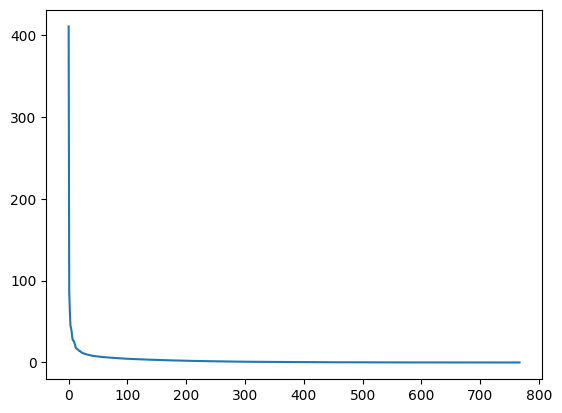

In [24]:
plt.plot(s)
plt.show()

- In the graph, we can see that although we have 768 singular values in s, most of those (after the 150th entry or so) are pretty small. So it might make sense to use only the information related to the first (say, 50) singular values to build a more economical approximation to our image.

- The idea is to consider all but the first k singular values in Sigma (which are the same as in s) as zeros, keeping U and Vt intact, and computing the product of these matrices as the approximation.

- For example, if we choose

In [26]:
k = 10

- we can build the approximation by doing

In [27]:
approx = U @ Sigma[:, :k] @ Vt[:k, :]

- Note that we had to use only the first k rows of Vt, since all other rows would be multiplied by the zeros corresponding to the singular values we eliminated from this approximation.

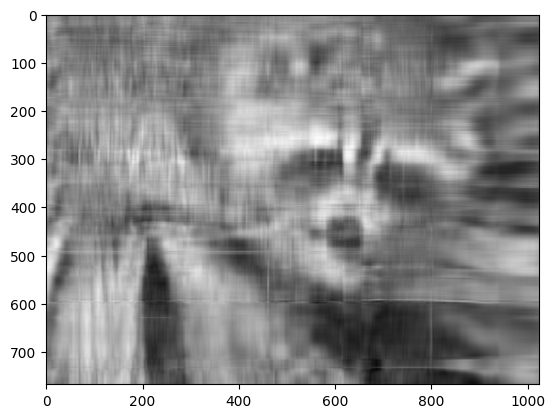

In [28]:
plt.imshow(approx, cmap="gray")
plt.show()

- Now, you can go ahead and repeat this experiment with other values of k, and each of your experiments should give you a slightly better (or worse) image depending on the value you choose.

#### Applying to all colors
- Now we want to do the same kind of operation, but to all three colors. Our first instinct might be to repeat the same operation we did above to each color matrix individually. However, NumPy’s broadcasting takes care of this for us.

- If our array has more than two dimensions, then the SVD can be applied to all axes at once. However, the linear algebra functions in NumPy expect to see an array of the form (n, M, N), where the first axis n represents the number of MxN matrices in the stack.

- In our case,

In [29]:
img_array.shape

(768, 1024, 3)

- so we need to permutate the axis on this array to get a shape like (3, 768, 1024). Fortunately, the numpy.transpose function can do that for us:
```python
np.tranpose(x, axes=(i, j, k))
```
- indicates that the axis will be reordered such that the final shape of the transposed array will be reordered according to the indices (i, j, k).

- Let’s see how this goes for our array:

In [31]:
img_array_transposed = np.transpose(img_array, (2, 0, 1))
img_array_transposed.shape

(3, 768, 1024)

- Now we are ready to apply the SVD:

In [32]:
U, s, Vt = linalg.svd(img_array_transposed)

- Finally, to obtain the full approximated image, we need to reassemble these matrices into the approximation. Now, note that

In [33]:
U.shape, s.shape, Vt.shape

((3, 768, 768), (3, 768), (3, 1024, 1024))

- To build the final approximation matrix, we must understand how multiplication across different axes works.

#### Products with n-dimensional arrays
- If you have worked before with only one- or two-dimensional arrays in NumPy, you might use numpy.dot and numpy.matmul (or the @ operator) interchangeably. However, for n-dimensional arrays, they work in very different ways. For more details, check the documentation on numpy.matmul.

- Now, to build our approximation, we first need to make sure that our singular values are ready for multiplication, so we build our Sigma matrix similarly to what we did before. The Sigma array must have dimensions (3, 768, 1024). In order to add the singular values to the diagonal of Sigma, we will again use the fill_diagonal function, using each of the 3 rows in s as the diagonal for each of the 3 matrices in Sigma:

In [34]:
Sigma = np.zeros((3, 768, 1024))
for j in range(3):
    np.fill_diagonal(Sigma[j, :, :], s[j, :])

- Now, if we wish to rebuild the full SVD (with no approximation), we can do

In [35]:
reconstructed = U @ Sigma @ Vt

- Note that

In [36]:
reconstructed.shape

(3, 768, 1024)

- The reconstructed image should be indistinguishable from the original one, except for differences due to floating point errors from the reconstruction. Recall that our original image consisted of floating point values in the range [0., 1.]. The accumulation of floating point error from the reconstruction can result in values slightly outside this original range:

In [37]:
reconstructed.min(), reconstructed.max()

(np.float64(-4.682886023399391e-15), np.float64(1.000000000000005))

- Since imshow expects values in the range, we can use clip to excise the floating point error:

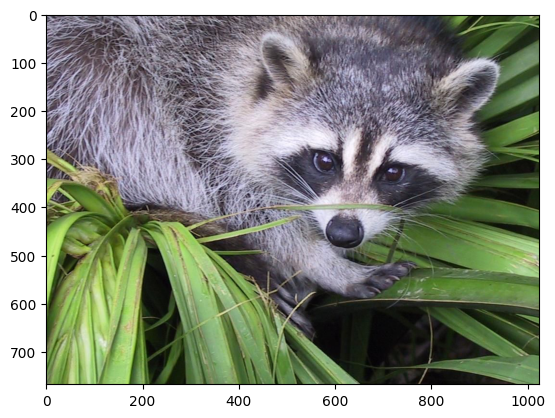

In [38]:
reconstructed = np.clip(reconstructed, 0, 1)
plt.imshow(np.transpose(reconstructed, (1, 2, 0)))
plt.show()

- In fact, imshow peforms this clipping under-the-hood, so if you skip the first line in the previous code cell, you might see a warning message saying "Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)."

- Now, to do the approximation, we must choose only the first k singular values for each color channel. This can be done using the following syntax:

In [39]:
approx_img = U @ Sigma[..., :k] @ Vt[..., :k, :]

- You can see that we have selected only the first k components of the last axis for Sigma (this means that we have used only the first k columns of each of the three matrices in the stack), and that we have selected only the first k components in the second-to-last axis of Vt (this means we have selected only the first k rows from every matrix in the stack Vt and all columns). If you are unfamiliar with the ellipsis syntax, it is a placeholder for other axes. For more details, see the documentation on Indexing.

- Now,

In [40]:
approx_img.shape

(3, 768, 1024)

- which is not the right shape for showing the image. Finally, reordering the axes back to our original shape of (768, 1024, 3), we can see our approximation:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1356713147246084..1.0794536079155876].


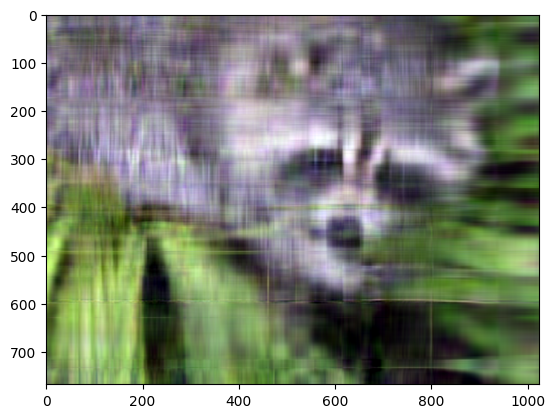

In [41]:
plt.imshow(np.transpose(approx_img, (1, 2, 0)))
plt.show()

- Even though the image is not as sharp, using a small number of k singular values (compared to the original set of 768 values), we can recover many of the distinguishing features from this image.

#### Final words
Of course, this is not the best method to approximate an image. However, there is, in fact, a result in linear algebra that says that the approximation we built above is the best we can get to the original matrix in terms of the norm of the difference. For more information, see G. H. Golub and C. F. Van Loan, Matrix Computations, Baltimore, MD, Johns Hopkins University Press, 1985.

### Masked Arrays
- From https://numpy.org/numpy-tutorials/content/tutorial-ma.html

#### What are masked arrays?
- Consider the following problem. You have a dataset with missing or invalid entries. If you’re doing any kind of processing on this data, and want to skip or flag these unwanted entries without just deleting them, you may have to use conditionals or filter your data somehow. The numpy.ma module provides some of the same functionality of NumPy ndarrays with added structure to ensure invalid entries are not used in computation.

- From the Reference Guide:
    - A masked array is the combination of a standard numpy.ndarray and a mask. A mask is either nomask, indicating that no value of the associated array is invalid, or an array of booleans that determines for each element of the associated array whether the value is valid or not. When an element of the mask is False, the corresponding element of the associated array is valid and is said to be unmasked. When an element of the mask is True, the corresponding element of the associated array is said to be masked (invalid).

- We can think of a MaskedArray as a combination of:
    - Data, as a regular numpy.ndarray of any shape or datatype;
    - A boolean mask with the same shape as the data;
    - A fill_value, a value that may be used to replace the invalid entries in order to return a standard numpy.ndarray.

#### When can they be useful?
- There are a few situations where masked arrays can be more useful than just eliminating the invalid entries of an array:
    - When you want to preserve the values you masked for later processing, without copying the array;
    - When you have to handle many arrays, each with their own mask. If the mask is part of the array, you avoid bugs and the code is possibly more compact;
    - When you have different flags for missing or invalid values, and wish to preserve these flags without replacing them in the original dataset, but exclude them from computations;
    - If you can’t avoid or eliminate missing values, but don’t want to deal with NaN (Not a Number) values in your operations.

- Masked arrays are also a good idea since the numpy.ma module also comes with a specific implementation of most NumPy universal functions (ufuncs), which means that you can still apply fast vectorized functions and operations on masked data. The output is then a masked array. We’ll see some examples of how this works in practice below.

#### Using masked arrays to see COVID-19 data
- From Kaggle it is possible to download a dataset with initial data about the COVID-19 outbreak in the beginning of 2020. We are going to look at a small subset of this data, contained in the file who_covid_19_sit_rep_time_series.csv. (Note that this file has been replaced with a version without missing data sometime in late 2020.)

In [43]:
import numpy as np

filename = "data/who_covid_19_sit_rep_time_series.csv"

- The data file contains data of different types and is organized as follows:
    - The first row is a header line that (mostly) describes the data in each column that follow in the rows below, and beginning in the fourth column, the header is the date of the observation.
    - The second through seventh row contain summary data that is of a different type than that which we are going to examine, so we will need to exclude that from the data with which we will work.
    - The numerical data we wish to work with begins at column 4, row 8, and extends from there to the rightmost column and the lowermost row.

- Let’s explore the data inside this file for the first 14 days of records. To gather data from the .csv file, we will use the numpy.genfromtxt function, making sure we select only the columns with actual numbers instead of the first four columns which contain location data. We also skip the first 6 rows of this file, since they contain other data we are not interested in. Separately, we will extract the information about dates and location for this data.

In [44]:
# Note we are using skip_header and usecols to read only portions of the
# data file into each variable.
# Read just the dates for columns 4-18 from the first row
dates = np.genfromtxt(
    filename,
    dtype=np.str_,
    delimiter=",",
    max_rows=1,
    usecols=range(4, 18),
    encoding="utf-8-sig",
)
# Read the names of the geographic locations from the first two
# columns, skipping the first six rows
locations = np.genfromtxt(
    filename,
    dtype=np.str_,
    delimiter=",",
    skip_header=6,
    usecols=(0, 1),
    encoding="utf-8-sig",
)
# Read the numeric data from just the first 14 days
nbcases = np.genfromtxt(
    filename,
    dtype=np.int_,
    delimiter=",",
    skip_header=6,
    usecols=range(4, 18),
    encoding="utf-8-sig",
)

- Included in the numpy.genfromtxt function call, we have selected the numpy.dtype for each subset of the data (either an integer - numpy.int_ - or a string of characters - numpy.str_). We have also used the encoding argument to select utf-8-sig as the encoding for the file (read more about encoding in the official Python documentation. You can read more about the numpy.genfromtxt function from the Reference Documentation or from the Basic IO tutorial.

#### Exploring the data
- First of all, we can plot the whole set of data we have and see what it looks like. In order to get a readable plot, we select only a few of the dates to show in our x-axis ticks. Note also that in our plot command, we use nbcases.T (the transpose of the nbcases array) since this means we will plot each row of the file as a separate line. We choose to plot a dashed line (using the '--' line style). See the matplotlib documentation for more info on this.

Text(0.5, 1.0, 'COVID-19 cumulative cases from Jan 21 to Feb 3 2020')

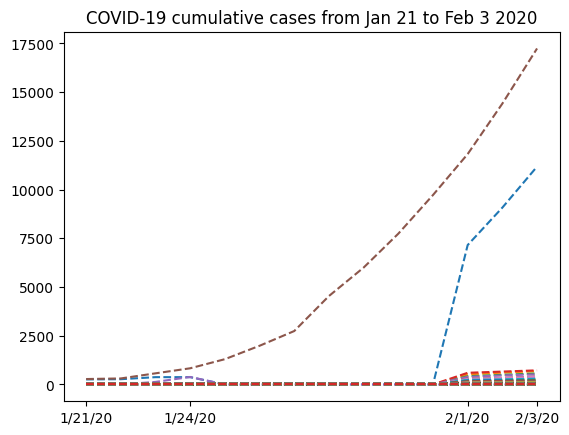

In [45]:
import matplotlib.pyplot as plt

selected_dates = [0, 3, 11, 13]
plt.plot(dates, nbcases.T, "--")
plt.xticks(selected_dates, dates[selected_dates])
plt.title("COVID-19 cumulative cases from Jan 21 to Feb 3 2020")

- The graph has a strange shape from January 24th to February 1st. It would be interesting to know where this data comes from. If we look at the locations array we extracted from the .csv file, we can see that we have two columns, where the first would contain regions and the second would contain the name of the country. However, only the first few rows contain data for the the first column (province names in China). Following that, we only have country names. So it would make sense to group all the data from China into a single row. For this, we’ll select from the nbcases array only the rows for which the second entry of the locations array corresponds to China. Next, we’ll use the numpy.sum function to sum all the selected rows (axis=0). Note also that row 35 corresponds to the total counts for the whole country for each date. Since we want to calculate the sum ourselves from the provinces data, we have to remove that row first from both locations and nbcases:

In [46]:
totals_row = 35
locations = np.delete(locations, (totals_row), axis=0)
nbcases = np.delete(nbcases, (totals_row), axis=0)

china_total = nbcases[locations[:, 1] == "China"].sum(axis=0)
china_total

array([  247,   288,   556,   817,   -22,   -22,   -15,   -10,    -9,
          -7,    -4, 11820, 14410, 17237])

- Something’s wrong with this data - we are not supposed to have negative values in a cumulative data set. What’s going on?
#### Missing data
- Looking at the data, here’s what we find: there is a period with missing data:

In [47]:
nbcases

array([[  258,   270,   375, ...,  7153,  9074, 11177],
       [   14,    17,    26, ...,   520,   604,   683],
       [   -1,     1,     1, ...,   422,   493,   566],
       ...,
       [   -1,    -1,    -1, ...,    -1,    -1,    -1],
       [   -1,    -1,    -1, ...,    -1,    -1,    -1],
       [   -1,    -1,    -1, ...,    -1,    -1,    -1]])

- All the -1 values we are seeing come from numpy.genfromtxt attempting to read missing data from the original .csv file. Obviously, we don’t want to compute missing data as -1 - we just want to skip this value so it doesn’t interfere in our analysis. After importing the numpy.ma module, we’ll create a new array, this time masking the invalid values:

In [48]:
from numpy import ma

nbcases_ma = ma.masked_values(nbcases, -1)

- If we look at the nbcases_ma masked array, this is what we have:

In [49]:
nbcases_ma

masked_array(
  data=[[258, 270, 375, ..., 7153, 9074, 11177],
        [14, 17, 26, ..., 520, 604, 683],
        [--, 1, 1, ..., 422, 493, 566],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-1)

- We can see that this is a different kind of array. As mentioned in the introduction, it has three attributes (data, mask and fill_value). Keep in mind that the mask attribute has a True value for elements corresponding to invalid data (represented by two dashes in the data attribute).

- Let’s try and see what the data looks like excluding the first row (data from the Hubei province in China) so we can look at the missing data more closely:

Text(0.5, 1.0, 'COVID-19 cumulative cases from Jan 21 to Feb 3 2020')

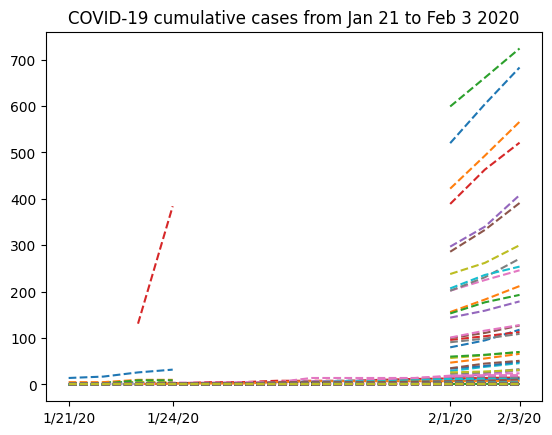

In [50]:
plt.plot(dates, nbcases_ma[1:].T, "--")
plt.xticks(selected_dates, dates[selected_dates])
plt.title("COVID-19 cumulative cases from Jan 21 to Feb 3 2020")

- Now that our data has been masked, let’s try summing up all the cases in China:

In [51]:
china_masked = nbcases_ma[locations[:, 1] == "China"].sum(axis=0)
china_masked

masked_array(data=[278, 309, 574, 835, 10, 10, 17, 22, 23, 25, 28, 11821,
                   14411, 17238],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False],
       fill_value=999999)

- Note that china_masked is a masked array, so it has a different data structure than a regular NumPy array. Now, we can access its data directly by using the .data attribute:

In [52]:
china_total = china_masked.data
china_total

array([  278,   309,   574,   835,    10,    10,    17,    22,    23,
          25,    28, 11821, 14411, 17238])

- That is better: no more negative values. However, we can still see that for some days, the cumulative number of cases seems to go down (from 835 to 10, for example), which does not agree with the definition of “cumulative data”. If we look more closely at the data, we can see that in the period where there was missing data in mainland China, there was valid data for Hong Kong, Taiwan, Macau and “Unspecified” regions of China. Maybe we can remove those from the total sum of cases in China, to get a better understanding of the data.

- First, we’ll identify the indices of locations in mainland China:

In [53]:
china_mask = (
    (locations[:, 1] == "China")
    & (locations[:, 0] != "Hong Kong")
    & (locations[:, 0] != "Taiwan")
    & (locations[:, 0] != "Macau")
    & (locations[:, 0] != "Unspecified*")
)

- Now, china_mask is an array of boolean values (True or False); we can check that the indices are what we wanted with the ma.nonzero method for masked arrays:

In [54]:
china_mask.nonzero()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 31, 33]),)

- Now we can correctly sum entries for mainland China:

In [55]:
china_total = nbcases_ma[china_mask].sum(axis=0)
china_total

masked_array(data=[278, 308, 440, 446, --, --, --, --, --, --, --, 11791,
                   14380, 17205],
             mask=[False, False, False, False,  True,  True,  True,  True,
                    True,  True,  True, False, False, False],
       fill_value=999999)

- We can replace the data with this information and plot a new graph, focusing on Mainland China:

Text(0.5, 1.0, 'COVID-19 cumulative cases from Jan 21 to Feb 3 2020 - Mainland China')

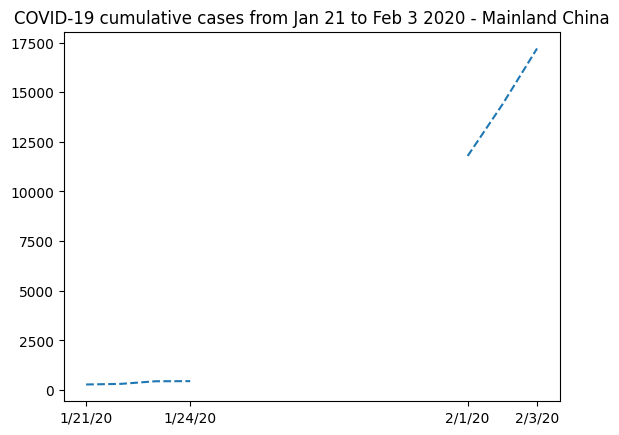

In [56]:
plt.plot(dates, china_total.T, "--")
plt.xticks(selected_dates, dates[selected_dates])
plt.title("COVID-19 cumulative cases from Jan 21 to Feb 3 2020 - Mainland China")

- It’s clear that masked arrays are the right solution here. We cannot represent the missing data without mischaracterizing the evolution of the curve.

#### Fitting Data
- One possibility we can think of is to interpolate the missing data to estimate the number of cases in late January. Observe that we can select the masked elements using the .mask attribute:

In [57]:
china_total.mask
invalid = china_total[china_total.mask]
invalid

masked_array(data=[--, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True],
       fill_value=999999,
            dtype=int64)

- We can also access the valid entries by using the logical negation for this mask:

In [58]:
valid = china_total[~china_total.mask]
valid

masked_array(data=[278, 308, 440, 446, 11791, 14380, 17205],
             mask=[False, False, False, False, False, False, False],
       fill_value=999999)

- Now, if we want to create a very simple approximation for this data, we should take into account the valid entries around the invalid ones. So first let’s select the dates for which the data is valid. Note that we can use the mask from the china_total masked array to index the dates array:

In [59]:
dates[~china_total.mask]

array(['1/21/20', '1/22/20', '1/23/20', '1/24/20', '2/1/20', '2/2/20',
       '2/3/20'], dtype='<U7')

- Finally, we can use the fitting functionality of the numpy.polynomial package to create a cubic polynomial model that fits the data as best as possible:

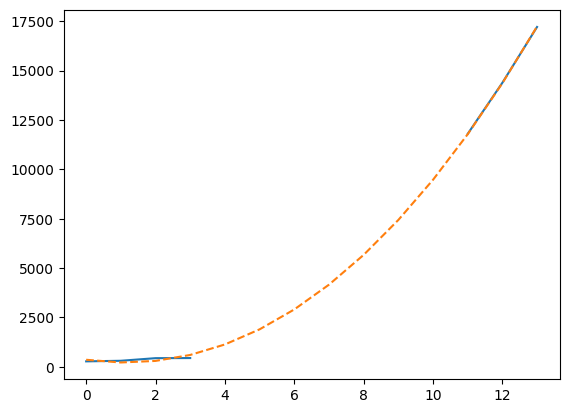

In [60]:
t = np.arange(len(china_total))
model = np.polynomial.Polynomial.fit(t[~china_total.mask], valid, deg=3)
plt.plot(t, china_total)
plt.plot(t, model(t), "--")

- This plot is not so readable since the lines seem to be over each other, so let’s summarize in a more elaborate plot. We’ll plot the real data when available, and show the cubic fit for unavailable data, using this fit to compute an estimate to the observed number of cases on January 28th 2020, 7 days after the beginning of the records:

Text(0.5, 1.0, 'COVID-19 cumulative cases from Jan 21 to Feb 3 2020 - Mainland China\nCubic estimate for 7 days after start')

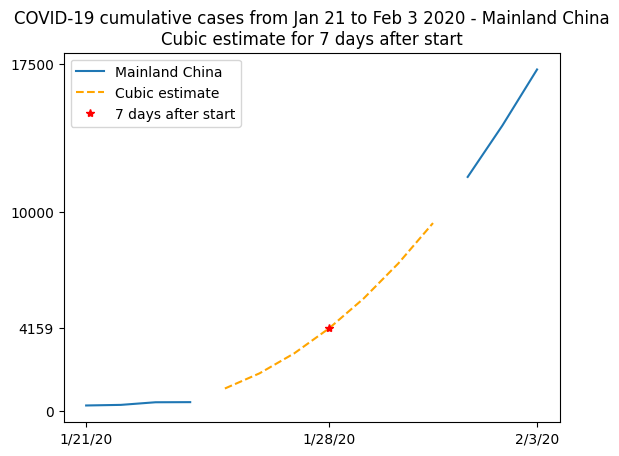

In [61]:
plt.plot(t, china_total)
plt.plot(t[china_total.mask], model(t)[china_total.mask], "--", color="orange")
plt.plot(7, model(7), "r*")
plt.xticks([0, 7, 13], dates[[0, 7, 13]])
plt.yticks([0, model(7), 10000, 17500])
plt.legend(["Mainland China", "Cubic estimate", "7 days after start"])
plt.title(
    "COVID-19 cumulative cases from Jan 21 to Feb 3 2020 - Mainland China\n"
    "Cubic estimate for 7 days after start"
)

#### In practice
- Adding -1 to missing data is not a problem with numpy.genfromtxt; in this particular case, substituting the missing value with 0 might have been fine, but we’ll see later that this is far from a general solution. Also, it is possible to call the numpy.genfromtxt function using the usemask parameter. If usemask=True, numpy.genfromtxt automatically returns a masked array.

### Determining Moore’s Law with real data in NumPy
- From https://numpy.org/numpy-tutorials/content/mooreslaw-tutorial.html
- The number of transistors reported per a given chip plotted on a log scale in the y axis with the date of introduction on the linear scale x-axis. The blue data points are from a transistor count table. The red line is an ordinary least squares prediction and the orange line is Moore’s law.

#### What you'll do
- In 1965, engineer Gordon Moore predicted that transistors on a chip would double every two years in the coming decade [1]. You’ll compare Moore’s prediction against actual transistor counts in the 53 years following his prediction. You will determine the best-fit constants to describe the exponential growth of transistors on semiconductors compared to Moore’s Law.

- You’ll use these NumPy and Matplotlib functions:
    - np.loadtxt: this function loads text into a NumPy array
    - np.log: this function takes the natural log of all elements in a NumPy array
    - np.exp: this function takes the exponential of all elements in a NumPy array
    - lambda: this is a minimal function definition for creating a function model
    - plt.semilogy: this function will plot x-y data onto a figure with a linear x-axis and 
 y-axis plt.plot: this function will plot x-y data on linear axes
    - slicing arrays: view parts of the data loaded into the workspace, slice the arrays e.g. x[:10] for the first 10 values in the array, x
    - boolean array indexing: to view parts of the data that match a given condition use boolean operations to index an array
    - np.block: to combine arrays into 2D arrays
    - np.newaxis: to change a 1D vector to a row or column vector
    - np.savez and np.savetxt: these two functions will save your arrays in zipped array format and text, respectively
#### Building Moore's law as exponential function
- Your empirical model assumes that the number of transistors per semiconductor follows an exponential growth,

$\log(\text{transistor\_count})= f(\text{year}) = A\cdot \text{year}+B,$

- where A and B are fitting constants. You use semicondcutor manufacturers' data to find the fitting contants. You determine these constants for Moore's law by specifying the rate for added transitors, 2, and giving an initial number of transitors for a given year.

- You stated Moore's law in an exponential form as follows,

$\text{transistor\_count}= e^{A_M\cdot \text{year} +B_M}.$

- Where A<sub>M</sub> and B<sub>M</sub> are constants that double the number of transitors every two years and start at 2250 transitors in 1971.

1. $\dfrac{\text{transistor\_count}(\text{year} +2)}{\text{transistor\_count}(\text{year})} = 2 = \dfrac{e^{B_M}e^{A_M \text{year} + 2A_M}}{e^{B_M}e^{A_M \text{year}}} = e^{2A_M} \rightarrow A_M = \frac{\log(2)}{2}$

2. $\log(2250) = \frac{\log(2)}{2}\cdot 1971 + B_M \rightarrow B_M = \log(2250)-\frac{\log(2)}{2}

- so Moore's law stated as an exponential function is

$\log(\text{transistor\_count})= A_M\cdot \text{year}+B_M,$\cdot 1971$

- where

$A_M=0.3466$

$B_M=-675.4$

- Since the function represents Moore’s law, define it as a Python function using lambda

In [62]:
A_M = np.log(2) / 2
B_M = np.log(2250) - A_M * 1971
Moores_law = lambda year: np.exp(B_M) * np.exp(A_M * year)

- In 1971, there were 2250 transistors on the Intel 4004 chip. Use Moores_law to check the number of semiconductors Gordon Moore would expect in 1973.

In [63]:
ML_1971 = Moores_law(1971)
ML_1973 = Moores_law(1973)
print("In 1973, G. Moore expects {:.0f} transistors on Intels chips".format(ML_1973))
print("This is x{:.2f} more transistors than 1971".format(ML_1973 / ML_1971))

In 1973, G. Moore expects 4500 transistors on Intels chips
This is x2.00 more transistors than 1971


#### Loading historical manufacturing data to your workspace
- Now, make a prediction based upon the historical data for semiconductors per chip. The Transistor Count [3] each year is in the transistor_data.csv file. Before loading a *.csv file into a NumPy array, its a good idea to inspect the structure of the file first. Then, locate the columns of interest and save them to a variable. Save two columns of the file to the array, data.

- Here, print out the first 10 rows of transistor_data.csv. The columns are

| Processor | MOS transistor count | Date of Introduction | Designer | MOSprocess | Area |
| -------  | -------------------- | -------------------- | --------- | ---------- | ---- |
| Intel 4004 (4-bit 16-pin) | 2250 | 1971 | Intel | “10,000 nm” | 12 mm² |

- You don’t need the columns that specify Processor, Designer, MOSprocess, or Area. That leaves the second and third columns, MOS transistor count and Date of Introduction, respectively.

- Next, you load these two columns into a NumPy array using np.loadtxt. The extra options below will put the data in the desired format:
    - delimiter = ',': specify delimeter as a comma ‘,’ (this is the default behavior)
    - usecols = [1,2]: import the second and third columns from the csv
    - skiprows = 1: do not use the first row, because its a header row

In [64]:
data = np.loadtxt("data/transistor_data.csv", delimiter=",", usecols=[1, 2], skiprows=1)

- You loaded the entire history of semiconducting into a NumPy array named data. The first column is the MOS transistor count and the second column is the Date of Introduction in a four-digit year.

- Next, make the data easier to read and manage by assigning the two columns to variables, year and transistor_count. Print out the first 10 values by slicing the year and transistor_count arrays with [:10]. Print these values out to check that you have the saved the data to the correct variables.

In [65]:
year = data[:, 1]  # grab the second column and assign
transistor_count = data[:, 0]  # grab the first column and assign

print("year:\t\t", year[:10])
print("trans. cnt:\t", transistor_count[:10])

year:		 [1971. 1972. 1973. 1974. 1974. 1974. 1974. 1975. 1975. 1975.]
trans. cnt:	 [2250. 3500. 2500. 3000. 4100. 6000. 8000. 4528. 4000. 5000.]


- You are creating a function that predicts the transistor count given a year. You have an independent variable, year, and a dependent variable, transistor_count. Transform the dependent variable to log-scale,

$y_i = \log($ `transistor_count[i]` $),$

- resulting in a linear equation,

$y_i = A\cdot \text{year} +B$.

In [66]:
yi = np.log(transistor_count)

#### Calculating the historical growth curve for transistors
- Your model assume that `yi` is a function of `year`. Now, find the best-fit model that minimizes the difference between $y_i$ and $A\cdot \text{year} +B, $ as such

$\min \sum|y_i - (A\cdot \text{year}_i + B)|^2.$

- This [sum of squares
error](https://en.wikipedia.org/wiki/Ordinary_least_squares) can be
succinctly represented as arrays as such

$\sum|\mathbf{y}-\mathbf{Z} [A,~B]^T|^2,$

- where $\mathbf{y}$ are the observations of the log of the number of
transistors in a 1D array and $\mathbf{Z}=[\text{year}_i^1,~\text{year}_i^0]$ are the
polynomial terms for $\text{year}_i$ in the first and second columns. By
creating this set of regressors in the $\mathbf{Z}-$matrix you set
up an ordinary least squares statistical model.

- `Z` is a linear model with two parameters, i.e. a polynomial with degree `1`.
Therefore we can represent the model with `numpy.polynomial.Polynomial` and
use the fitting functionality to determine the model parameters:

In [67]:
model = np.polynomial.Polynomial.fit(year, yi, deg=1)

- By default, `Polynomial.fit` performs the fit in the domain determined by the
independent variable (`year` in this case).
The coefficients for the unscaled and unshifted model can be recovered with the
`convert` method:


In [68]:
model = model.convert()
model

Polynomial([-6.66326406e+02,  3.41632083e-01], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

- The individual parameters $A$ and $B$ are the coefficients of our linear model:

In [69]:
B, A = model

- Did manufacturers double the transistor count every two years? You have
the final formula,

$\dfrac{\text{transistor\_count}(\text{year} +2)}{\text{transistor\_count}(\text{year})} = xFactor =
\dfrac{e^{B}e^{A( \text{year} + 2)}}{e^{B}e^{A \text{year}}} = e^{2A}$

- where increase in number of transistors is $xFactor,$ number of years is
2, and $A$ is the best fit slope on the semilog function.

In [70]:
print(f"Rate of semiconductors added on a chip every 2 years: {np.exp(2 * A):.2f}")

Rate of semiconductors added on a chip every 2 years: 1.98


- Based upon your least-squares regression model, the number of
semiconductors per chip increased by a factor of $1.98$ every two
years. You have a model that predicts the number of semiconductors each
year. Now compare your model to the actual manufacturing reports.  Plot
the linear regression results and all of the transistor counts.

- Here, use **plt.semilogy** to plot the number of transistors on a log-scale and the year on a
linear scale. You have defined a three arrays to get to a final model

$y_i = \log(\text{transistor\_count}),$

$y_i = A \cdot \text{year} + B,$

- and

$\log(\text{transistor\_count}) = A\cdot \text{year} + B,$

your variables, `transistor_count`, `year`, and `yi` all have the same
dimensions, `(179,)`. NumPy arrays need the same dimensions to make a
plot. The predicted number of transistors is now

$\text{transistor\_count}_{\text{predicted}} = e^Be^{A\cdot \text{year}}$.

+++

- In the next plot, use the `fivethirtyeight` style sheet.
The style sheet replicates
https://fivethirtyeight.com elements. Change the matplotlib style with plt.style.use.


Text(0, 0.5, '# of transistors\nper microprocessor')

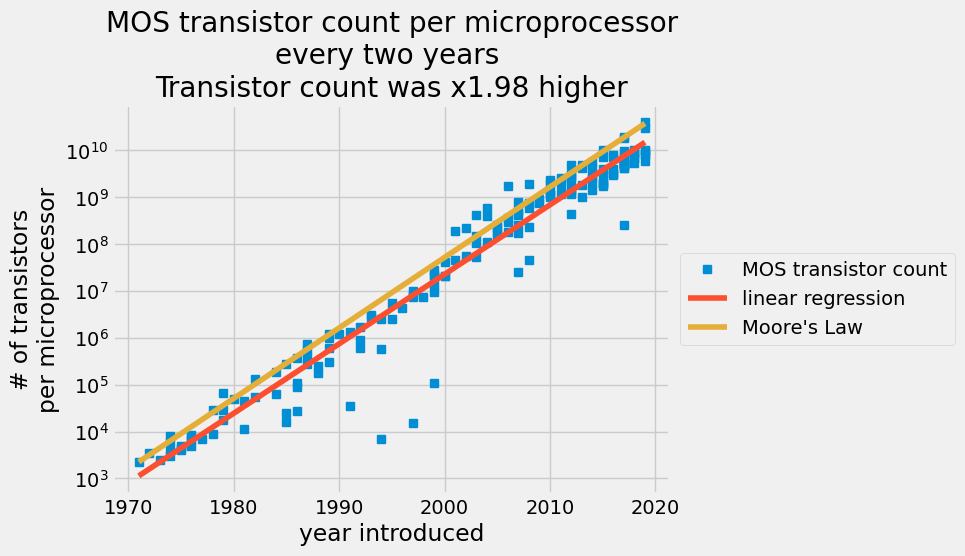

In [71]:
transistor_count_predicted = np.exp(B) * np.exp(A * year)
transistor_Moores_law = Moores_law(year)
plt.style.use("fivethirtyeight")
plt.semilogy(year, transistor_count, "s", label="MOS transistor count")
plt.semilogy(year, transistor_count_predicted, label="linear regression")


plt.plot(year, transistor_Moores_law, label="Moore's Law")
plt.title(
    "MOS transistor count per microprocessor\n"
    + "every two years \n"
    + "Transistor count was x{:.2f} higher".format(np.exp(A * 2))
)
plt.xlabel("year introduced")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.ylabel("# of transistors\nper microprocessor")

- A scatter plot of MOS transistor count per microprocessor every two years with a red line for the ordinary least squares prediction and an orange line for Moore's law.

- The linear regression captures the increase in the number of transistors
per semiconductors each year.  In 2015, semiconductor manufacturers
claimed they could not keep up with Moore's law anymore. Your analysis
shows that since 1971, the average increase in transistor count was
x1.98 every 2 years, but Gordon Moore predicted it would be x2
every 2 years. That is an amazing prediction.

- Consider the year 2017. Compare the data to your linear regression
model and Gordon Moore's prediction. First, get the
transistor counts from the year 2017. You can do this with a Boolean
comparator,

`year == 2017`.

- Then, make a prediction for 2017 with `Moores_law` defined above
and plugging in your best fit constants into your function

$\text{transistor_count} = e^{B}e^{A\cdot \text{year}}$.

- A great way to compare these measurements is to compare your prediction
and Moore's prediction to the average transistor count and look at the
range of reported values for that year. Use the `plt.plot`
option, `alpha=0.2` to increase the transparency of the data. The more opaque the points
appear, the more reported values lie on that measurement. The green $+$
is the average reported transistor count for 2017. Plot your predictions
for $\pm\frac{1}{2}~years.

19200000000.0 250000000.0 7050000000.0


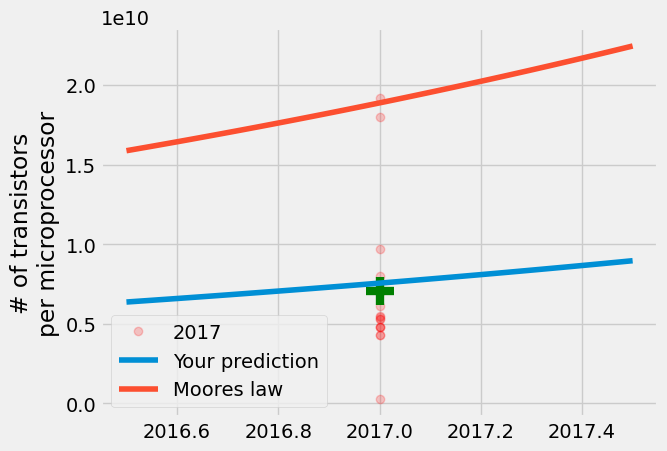

In [72]:
transistor_count2017 = transistor_count[year == 2017]
print(
    transistor_count2017.max(), transistor_count2017.min(), transistor_count2017.mean()
)
y = np.linspace(2016.5, 2017.5)
your_model2017 = np.exp(B) * np.exp(A * y)
Moore_Model2017 = Moores_law(y)

plt.plot(
    2017 * np.ones(np.sum(year == 2017)),
    transistor_count2017,
    "ro",
    label="2017",
    alpha=0.2,
)
plt.plot(2017, transistor_count2017.mean(), "g+", markersize=20, mew=6)

plt.plot(y, your_model2017, label="Your prediction")
plt.plot(y, Moore_Model2017, label="Moores law")
plt.ylabel("# of transistors\nper microprocessor")
plt.legend()

- The result is that your model is close to the mean, but Gordon
Moore's prediction is closer to the maximum number of transistors per
microprocessor produced in 2017. Even though semiconductor manufacturers
thought that the growth would slow, once in 1975 and now again
approaching 2025, manufacturers are still producing semiconductors every 2 years that
nearly double the number of transistors.

- The linear regression model is much better at predicting the
average than extreme values because it satisfies the condition to
minimize $\sum |y_i - A\cdot \text{year}[i]+B|^2$.

+++

#### Sharing your results as zipped arrays and a csv

- The last step, is to share your findings. You created
new arrays that represent a linear regression model and Gordon Moore's
prediction. You started this process by importing a csv file into a NumPy
array using `np.loadtxt`, to save your model use two approaches

1. `np.savez` save NumPy arrays for other Python sessions
2. `np.savetxt`: save a csv file with the original data and your predicted data

#### Zipping the arrays into a file
- Using `np.savez`, you can save thousands of arrays and give them names. The
function `np.load` will load the arrays back into the workspace as a
dictionary. You'll save a five arrays so the next user will have the year,
transistor count, predicted transistor count,  Gordon Moore's
predicted count, and fitting constants. Add one more variable that other users can use to
understand the model, `notes`.

In [73]:
notes = "the arrays in this file are the result of a linear regression model\n"
notes += "the arrays include\nyear: year of manufacture\n"
notes += "transistor_count: number of transistors reported by manufacturers in a given year\n"
notes += "transistor_count_predicted: linear regression model = exp({:.2f})*exp({:.2f}*year)\n".format(
    B, A
)
notes += "transistor_Moores_law: Moores law =exp({:.2f})*exp({:.2f}*year)\n".format(
    B_M, A_M
)
notes += "regression_csts: linear regression constants A and B for log(transistor_count)=A*year+B"
print(notes)

the arrays in this file are the result of a linear regression model
the arrays include
year: year of manufacture
transistor_count: number of transistors reported by manufacturers in a given year
transistor_count_predicted: linear regression model = exp(-666.33)*exp(0.34*year)
transistor_Moores_law: Moores law =exp(-675.38)*exp(0.35*year)
regression_csts: linear regression constants A and B for log(transistor_count)=A*year+B


In [75]:
np.savez(
    "data/mooreslaw_regression.npz",
    notes=notes,
    year=year,
    transistor_count=transistor_count,
    transistor_count_predicted=transistor_count_predicted,
    transistor_Moores_law=transistor_Moores_law,
    regression_csts=(A, B),
)

In [76]:
results = np.load("data/mooreslaw_regression.npz")

In [77]:
print(results["regression_csts"][1])

-666.326406353623


- The benefit of `np.savez` is you can save hundreds of arrays with
different shapes and types. Here, you saved 4 arrays that are double
precision floating point numbers shape = `(179,)`, one array that was
text, and one array of double precision floating point numbers shape =
`(2,).` This is the preferred method for saving NumPy arrays for use in
another analysis.

#### Creating your own comma separated value file

- If you want to share data and view the results in a table, then you have to
create a text file. Save the data using `np.savetxt`. This
function is more limited than `np.savez`. Delimited files, like csv's,
need 2D arrays.

- Prepare the data for export by creating a new 2D array whose columns
contain the data of interest.

- Use the `header` option to describe the data and the columns of
the file. Define another variable that contains file
information as `head`.

In [78]:
head = "the columns in this file are the result of a linear regression model\n"
head += "the columns include\nyear: year of manufacture\n"
head += "transistor_count: number of transistors reported by manufacturers in a given year\n"
head += "transistor_count_predicted: linear regression model = exp({:.2f})*exp({:.2f}*year)\n".format(
    B, A
)
head += "transistor_Moores_law: Moores law =exp({:.2f})*exp({:.2f}*year)\n".format(
    B_M, A_M
)
head += "year:, transistor_count:, transistor_count_predicted:, transistor_Moores_law:"
print(head)

the columns in this file are the result of a linear regression model
the columns include
year: year of manufacture
transistor_count: number of transistors reported by manufacturers in a given year
transistor_count_predicted: linear regression model = exp(-666.33)*exp(0.34*year)
transistor_Moores_law: Moores law =exp(-675.38)*exp(0.35*year)
year:, transistor_count:, transistor_count_predicted:, transistor_Moores_law:


- Build a single 2D array to export to csv. Tabular data is inherently two
dimensional. You need to organize your data to fit this 2D structure.
Use `year`, `transistor_count`, `transistor_count_predicted`, and
`transistor_Moores_law` as the first through fourth columns,
respectively. Put the calculated constants in the header since they do
not fit the `(179,)` shape. The `np.block` function appends arrays together to create a new, larger array. Arrange
the 1D vectors as columns using `np.newaxis`


In [79]:
year.shape

(179,)

In [80]:
year[:,np.newaxis].shape

(179, 1)

In [81]:
output = np.block(
    [
        year[:, np.newaxis],
        transistor_count[:, np.newaxis],
        transistor_count_predicted[:, np.newaxis],
        transistor_Moores_law[:, np.newaxis],
    ]
)

- Creating the `mooreslaw_regression.csv` with `np.savetxt`, use three
options to create the desired file format:
    * `X = output` : use `output` block to write the data into the file
    * `delimiter = ','` : use commas to separate columns in the file
    * `header = head` : use the header `head` defined above

In [82]:
np.savetxt("data/mooreslaw_regression.csv", X=output, delimiter=",", header=head)

#### Wrapping up

- In conclusion, you have compared historical data for semiconductor
manufacturers to Moore's law and created a linear regression model to
find the average number of transistors added to each microprocessor
every two years. Gordon Moore predicted the number of transistors would
double every two years from 1965 through 1975, but the average growth
has maintained a consistent increase of $\times 1.98 \pm 0.01$ every two
years from 1971 through 2019.  In 2015, Moore revised his prediction to
say Moore's law should hold until 2025. You can share these results as a zipped NumPy array file,
`mooreslaw_regression.npz`, or as another csv,
`mooreslaw_regression.csv`.  The amazing progress in semiconductor
manufacturing has enabled new industries and computational power. This
analysis should give you a small insight into how incredible this growth
has been over the last half-century.

+++